# k-NN

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report

In [2]:
# Download NLTK data (run this once)
nltk.download('stopwords')
nltk.download('punkt')

# Load the dataset
df = pd.read_csv('spamain.csv', encoding='ISO-8859-1')
df = df[['v1', 'v2']]  # Select relevant columns
df.columns = ['label', 'message']  # Rename columns
df.dropna(inplace=True)  # Drop missing values
df['label'] = df['label'].map({'ham': 0, 'spam': 1})  # Convert labels to 0 and 1

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report

# Download NLTK data (run this once)
nltk.download('stopwords')
nltk.download('punkt')

# Load the dataset
df = pd.read_csv('spamain.csv', encoding='ISO-8859-1')
df = df[['v1', 'v2']]  # Select relevant columns
df.columns = ['label', 'message']  # Rename columns
df.dropna(inplace=True)  # Drop missing values
df['label'] = df['label'].map({'ham': 0, 'spam': 1})  # Convert labels to 0 and 1

# Preprocessing function
ps = PorterStemmer()

def preprocess_text(text):
    text = text.lower()  # Lowercase
    tokens = nltk.word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word.isalnum()]  # Remove special characters
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    tokens = [ps.stem(word) for word in tokens]  # Stem words
    return " ".join(tokens)

# Apply preprocessing to the message column
df['message'] = df['message'].apply(preprocess_text)

# Vectorize the text using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['message'])
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 2: k-Nearest Neighbors (k-NN)
knn_model = KNeighborsClassifier(n_neighbors=5)  # k=5 is common but can be tuned
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluation for k-NN
print("\nk-Nearest Neighbors Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(classification_report(y_test, y_pred_knn))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



k-Nearest Neighbors Performance:
Accuracy: 0.9166
Precision: 1.0000
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       965
           1       1.00      0.38      0.55       150

    accuracy                           0.92      1115
   macro avg       0.96      0.69      0.75      1115
weighted avg       0.92      0.92      0.90      1115



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Evaluate k-NN model using Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix for k-NN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for k-NN')
plt.legend(loc="lower right")
plt.show()

# Dimensionality Reduction for 2D Visualization
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Train k-NN on the reduced 2D data
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_pca, y)

# Visualize decision boundaries using a mesh grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm, label='Data points')
plt.title("k-NN Decision Boundary (PCA-reduced data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


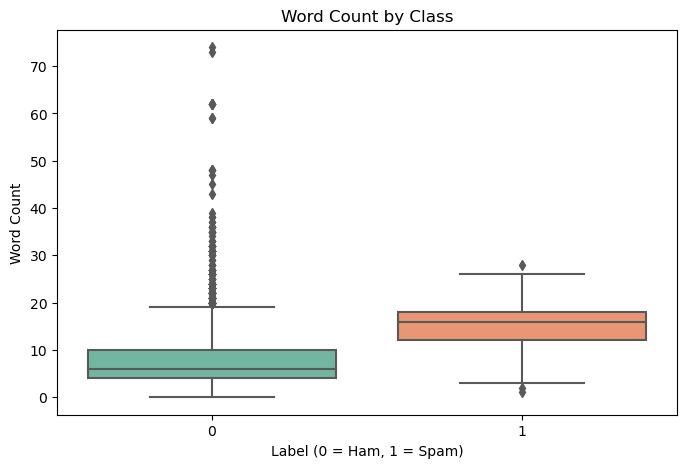

In [9]:
# Calculate word count
df['word_count'] = df['message'].apply(lambda x: len(x.split()))

# Plot word count distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x='label', y='word_count', data=df, palette='Set2')
plt.title("Word Count by Class")
plt.xlabel("Label (0 = Ham, 1 = Spam)")
plt.ylabel("Word Count")
plt.show()


# Second dataset https://www.kaggle.com/datasets/hailinsong/spam-ham-email-combined-dataset

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report

# Download NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Load the dataset
data = pd.read_csv('spamham.csv', encoding='ISO-8859-1')
data = data[['Text', 'Label']]
data.columns = ['message', 'label']
data.dropna(inplace=True)
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Preprocessing function
ps = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    tokens = [ps.stem(word) for word in tokens]
    return " ".join(tokens)

# Apply preprocessing to the message column
data['message'] = data['message'].apply(preprocess_text)

# Vectorize the text using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['message'])
y = data['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: k-Nearest Neighbors (k-NN)
knn_model = KNeighborsClassifier(n_neighbors=5)  # k=5 is common but can be tuned
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluation for k-NN
print("\nk-Nearest Neighbors Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(classification_report(y_test, y_pred_knn))



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



k-Nearest Neighbors Performance:
Accuracy: 0.8266
Precision: 0.8813
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       544
           1       0.88      0.70      0.78       425

    accuracy                           0.83       969
   macro avg       0.84      0.81      0.82       969
weighted avg       0.83      0.83      0.82       969

